In [1]:
# Importing the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [5]:
HR = pd.read_csv('/Users/dayanamoncada/Desktop/DataVisProject2/HR_comma_sep.csv')

In [9]:
# Scrubbing the data

# Check to see if there are any missing values in our data set
HR.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [7]:
# Let's take a look at a quick overview of what exactly is in our dataset
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
# Labeling

# Renaming certain columns for better readability
HR = HR.rename(columns={'satisfaction_level': 'Satisfaction', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'NumberCompany',
                        'average_montly_hours': 'AverageMonthlyHours',
                        'time_spend_company': 'TimeAtCompany',
                        'Work_accident': 'WorkAccident',
                        'promotion_last_5years': 'Promotion',
                        'sales' : 'Department',
                        'left' : 'Turnover'
                        })

In [16]:
HR.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
# Feature conversion 

# Convert "department" and "salary" features to numeric types because some functions won't be able to work with string types
HR['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
HR['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

HR.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [19]:
# Move the reponse variable "turnover" to the front of the table
front = HR['turnover']
HR.drop(labels=['turnover'], axis=1,inplace = True)
HR.insert(0, 'turnover', front)
HR.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


In [21]:
# Exploratory data analysis 
#Statistical overview 

# The dataset contains 10 columns and 14999 observations
HR.shape

(14999, 10)

In [22]:
# Check the type of our features. 
HR.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department               int64
salary                   int64
dtype: object

In [23]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = HR.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [24]:
# Overview of summary
# On average, employees who left had a lower satisfaction level of -20%**, worked 8hours more per month, 
# had lower salary, and had a lower promotion rate
turnover_Summary = HR.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
turnover,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.408908,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.118734,0.414730


In [26]:
# Display the statistical overview of the employees
HR.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.043814,-0.157898
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.015413,0.050022
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.011855,-0.013002
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.005577,-0.001803
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002387,-0.002242
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.001611,0.048715
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.019215,0.009247
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.015170,0.098119
department,-0.043814,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,0.015170,1.000000,0.033415
salary,-0.157898,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,0.033415,1.000000


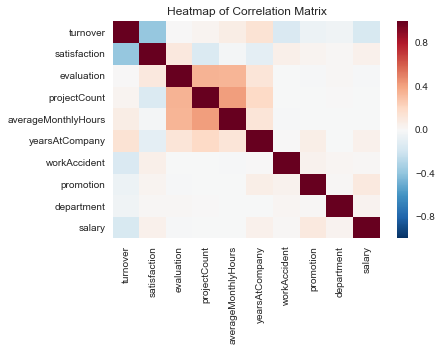

In [28]:
#Correlation Matrix & Heatmap

corr = HR.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

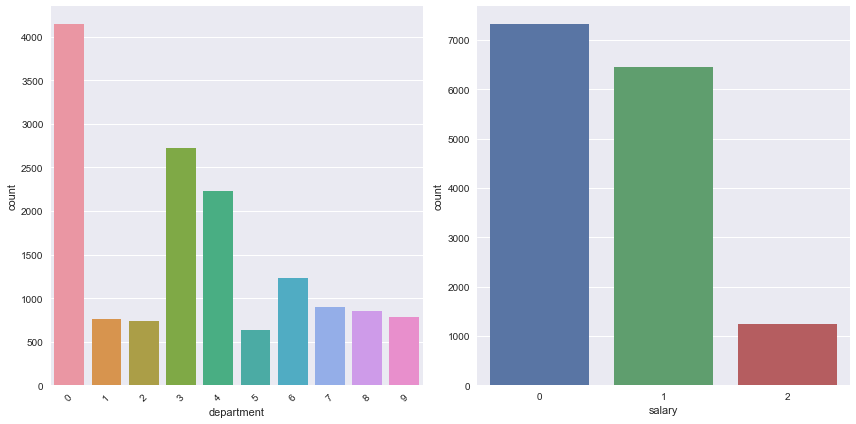

In [43]:
# General Visualizations
# We can conclude from the above two histograms the following things: 
# The sales department has the highest number of employees.
# The majority of employees in this dataset have a low to medium salary

# These first two histograms will show us what department the employees do in the company and where they are in salary.  We do the code as follows:
fig, axs = plt.subplots(ncols=2,figsize=(12,6))
x = sns.countplot(HR['department'], ax=axs[0])
plt.setp(x.get_xticklabels(), rotation=45)
y = sns.countplot(HR['salary'], ax=axs[1])
plt.tight_layout()
plt.show()


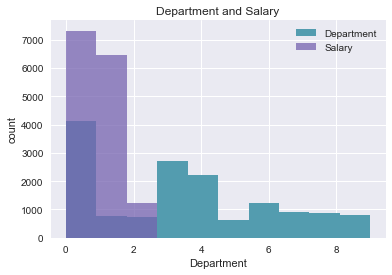

In [69]:
# Define a function for an overlaid histogram
def overlaid_histogram(data1, data1_name, data1_color, data2, data2_name, data2_color, x_label, y_label, title):
    # Set the bounds for the bins so that the two distributions are
    # fairly compared
    max_nbins = 10
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins
    bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)

    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')

# Call the function to create plot
overlaid_histogram(data1 = HR['department']
                   , data1_name = 'Department'
                   , data1_color = '#539caf'
                   , data2 = HR['salary']
                   , data2_name = 'Salary'
                   , data2_color = '#7663b0'
                   , x_label = 'Department'
                   , y_label = 'count'
                   , title = 'Department and Salary')

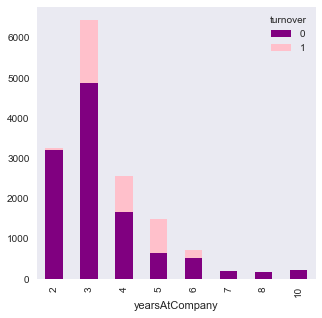

In [63]:
#YearsAtCompany   V.S.   Turnover
clarity_color_table = pd.crosstab(index=HR["yearsAtCompany"], columns=HR["turnover"])

clarity_color_table.plot(kind="bar", figsize=(5,5),stacked=True, color=['purple','pink'], grid=False)

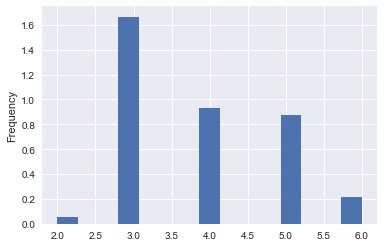

In [66]:
#Frequency table of Turnover VS YearsAtCompany

HR.loc[(HR['turnover'] == 1),'yearsAtCompany'].plot(kind='hist', normed=1, bins=15, stacked=False, alpha=1)

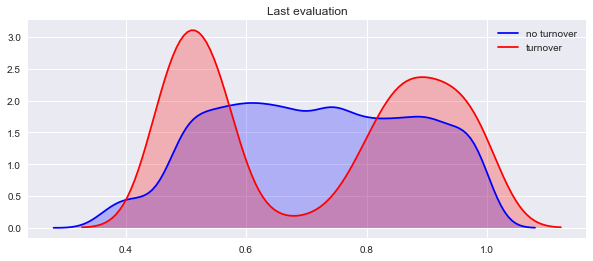

In [47]:
# Turnover V.S. Evaluation

# Summary: There seems to be a biomodal distrubtion for those that had a turnover. 
# It looks like employees who performed bad or performed well left the company. 
# The sweet spot seems for those that stayed seems to be within 0.6-0.8.


fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(HR.loc[(HR['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(HR.loc[(HR['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Last evaluation')

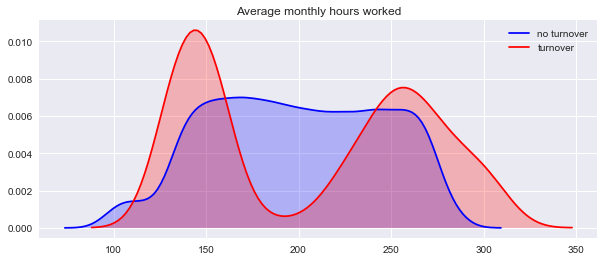

In [39]:
# Turnover V.S. AverageMonthlyHours

# Summary, Another noticeable bi-modal distrubtion for employees that turnovered. 
# It looks like employees who had less hours of work (~150hours or less) and employees who had too many hours of work (~250 or more) left the company. 
# Meaning that employees who left generally were underworked or overworked.

#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(HR.loc[(HR['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(HR.loc[(HR['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Average monthly hours worked')

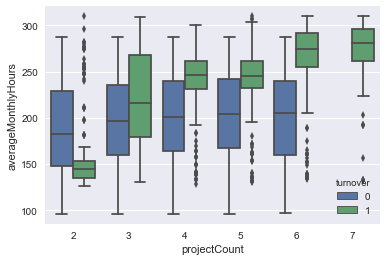

In [35]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=HR)

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: projectCount, dtype: int64


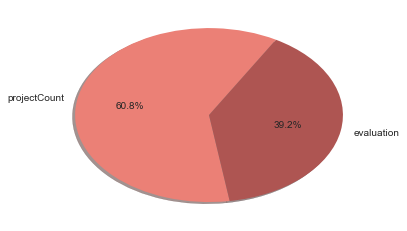

In [81]:
#One way of creating pie charts is looking at the distribution of the variable that you need
#to create the pie chart of and find the frequencies. Then create the actual pie based on those
#numbers. 
projectCount = HR['projectCount'].value_counts()
print(projectCount)

#and here we create the actual pie chart of the distribution
labels = ['projectCount', 'evaluation']
sizes = [76, 49]
colors = ['#EB8076', '#AE5552']
explode = [0,0]
plt.pie(sizes, labels=labels,colors = colors, autopct = '%1.1f%%', shadow = True,startangle=60)
#plt.axis('equal')
plt.show()

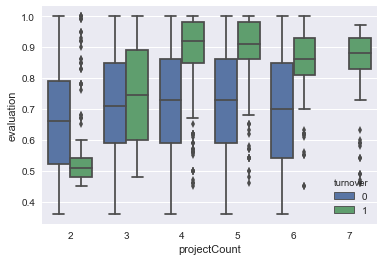

In [80]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=HR)